# SVM con *scorings*

In [1]:
import pandas as pd

In [ ]:
# Carga de los dataframes con los mejores scores de las proteínas para cada programa de docking
# Autodock 4. LE (lowest energy), LC (largest Cluster)
df_ad4_results_LE = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_AD4_LE.csv', index_col=0)
df_ad4_results_LC = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_AD4_LC.csv', index_col=0)
# Autodock Vina
df_vina_results = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_VINA.csv', index_col=0)
# Vinardo scoring
df_vinardo_results = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_VINARDO.csv', index_col=0)

In [11]:
# Carga de los dataframes con los mejores scores de las proteínas para cada programa de docking
# Autodock 4. LE (lowest energy), LC (largest Cluster)
df_ad4_results_LE = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_AD4_LE.csv', index_col=0)
df_ad4_results_LC = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_AD4_LC.csv', index_col=0)
# Autodock Vina
df_vina_results = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_VINA.csv', index_col=0)
# Vinardo scoring
df_vinardo_results = pd.read_csv(F'{data_dir}/vs_docking_crys_ensemble_VINARDO.csv', index_col=0)

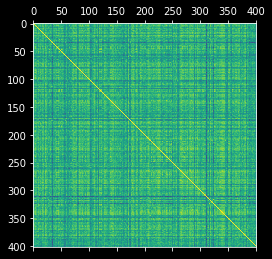

In [138]:
# Caso estudio Vinardo
# Correlación entre las conformaciones
import matplotlib.pyplot as plt

plt.matshow(df_vinardo_results.corr())
plt.show()

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [135]:
# Primer intento para vinardo
X = df_vinardo_results.iloc[:, 1:]
y = (df_vinardo_results["ActiveInactive"] == "Active").astype(np.float32)

In [44]:
# Primer intento para vinardo
X = df_vinardo_results.iloc[:, 1:]
y = (df_vinardo_results["ActiveInactive"] == "Active").astype(np.float32)

In [115]:
SVCpipe = Pipeline([
        ("scaler", StandardScaler()),
        ("SVC", LinearSVC(loss = 'hinge'))
    ])

In [116]:
parametros = {'SVC__C': [10**i for i in range(-2, 5)]}
print("C:", parametros["SVC__C"])

C: [0.01, 0.1, 1, 10, 100, 1000, 10000]


In [117]:
from sklearn.model_selection import GridSearchCV
linearSVC = GridSearchCV(SVCpipe, parametros, cv = 5, return_train_score = True)

{'SVC__C': 0.1}


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

1.0

0.9565217391304348

0.9565217391304348

In [77]:
#

,ActiveInactive,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
Ligando,,,,,,,,,,,,,,,,,,,,,
CS1,Active,-8.4,-7.6,-7.2,-7.8,-7.2,-8.1,-7.5,-7.6,-7.8,...,-6.8,-7.0,-6.8,-7.4,-7.2,-6.9,-7.2,-7.3,-7.8,-6.8
CS2,Active,-6.1,-6.2,-6.4,-6.9,-6.5,-6.8,-6.6,-6.3,-6.2,...,-5.6,-6.0,-5.7,-6.1,-5.8,-5.9,-6.2,-5.8,-6.6,-5.6
CS3,Active,-8.6,-8.3,-8.3,-8.0,-8.2,-8.6,-8.6,-8.6,-8.4,...,-7.2,-7.7,-7.5,-8.2,-7.6,-8.3,-8.2,-7.5,-8.3,-7.5
CS4,Active,-8.9,-8.0,-8.2,-7.8,-8.1,-8.7,-8.3,-8.6,-8.7,...,-7.3,-7.7,-7.4,-7.8,-7.4,-8.1,-8.2,-7.6,-8.2,-7.6
CS9,Active,-9.0,-8.3,-8.3,-8.5,-8.2,-9.0,-8.8,-8.3,-9.2,...,-8.2,-8.1,-7.9,-7.8,-7.9,-7.5,-8.4,-7.8,-8.8,-7.9
CS10,Active,-8.7,-9.3,-8.1,-9.0,-8.2,-9.1,-8.6,-8.4,-9.5,...,-8.2,-8.1,-8.2,-8.4,-7.3,-8.5,-8.8,-8.0,-8.5,-8.3
CS11,Active,-8.2,-8.4,-8.5,-8.0,-8.0,-8.3,-8.8,-8.2,-8.6,...,-7.8,-7.8,-7.7,-8.1,-7.7,-8.0,-8.5,-7.5,-8.0,-8.0
CS12,Active,-6.5,-6.7,-6.2,-6.8,-6.8,-6.7,-7.0,-7.0,-6.7,...,-6.1,-6.4,-6.1,-6.6,-6.3,-6.3,-6.5,-6.3,-6.8,-6.0
CS13,Active,-8.9,-8.3,-8.3,-8.1,-8.6,-8.8,-8.7,-8.2,-8.5,...,-7.8,-8.2,-7.5,-7.5,-7.7,-8.2,-8.5,-7.7,-8.2,-8.1
